In [107]:
import pandas as pd

In [108]:
data = ['a', 'b', 'c', 'd', 'e']
df_serie = pd.Series(data)
df_serie

0    a
1    b
2    c
3    d
4    e
dtype: object

In [109]:
df_serie[0]

'a'

In [110]:
df = pd.DataFrame({
    'name': ['Paul', 'John', 'Paco'],
    'age': [13, 14, 18],
    'job': ['jardinero', 'butanero', 'fontanero'],
})
df

,name,age,job
0,Paul,13,jardinero
1,John,14,butanero
2,Paco,18,fontanero


In [111]:
df = df.set_index('name')
df

,age,job
name,,
Paul,13,jardinero
John,14,butanero
Paco,18,fontanero


In [112]:
df.loc['Paco']

age           18
job    fontanero
Name: Paco, dtype: object

In [113]:
df.loc['Paul', 'age']

np.int64(13)

In [114]:
df.iloc[1]

age          14
job    butanero
Name: John, dtype: object

In [115]:
df.iloc[0:2]

,age,job
name,,
Paul,13,jardinero
John,14,butanero


In [116]:
df.iloc[0:2, 1] #Solo salen los trabajos de los 2 primeros registros. Sale tb el nombre porque el indice del dataframe en este caso es el campo 'name'

name
Paul    jardinero
John     butanero
Name: job, dtype: object

In [117]:
df.iloc[1, 0]

np.int64(14)

In [118]:
df.at['Paul', 'age']

np.int64(13)

In [119]:
df.iat[0, 0]

np.int64(13)

In [120]:
df

,age,job
name,,
Paul,13,jardinero
John,14,butanero
Paco,18,fontanero


In [121]:
df.at['Paul', 'age'] = 60
df

,age,job
name,,
Paul,60,jardinero
John,14,butanero
Paco,18,fontanero


In [122]:
df.loc['Paul'] = [55, 'Peluquero']
df

,age,job
name,,
Paul,55,Peluquero
John,14,butanero
Paco,18,fontanero


In [123]:
df.loc['Pepe'] = [90, 'Carretillero']
df

,age,job
name,,
Paul,55,Peluquero
John,14,butanero
Paco,18,fontanero
Pepe,90,Carretillero


In [124]:
df['City'] = ['Llodio', 'Amurrio', 'Orozko', 'Orduña']
df

,age,job,City
name,,,
Paul,55,Peluquero,Llodio
John,14,butanero,Amurrio
Paco,18,fontanero,Orozko
Pepe,90,Carretillero,Orduña


In [125]:
df = df.reset_index()
df

,name,age,job,City
0,Paul,55,Peluquero,Llodio
1,John,14,butanero,Amurrio
2,Paco,18,fontanero,Orozko
3,Pepe,90,Carretillero,Orduña


In [126]:
df.loc[0]

name         Paul
age            55
job     Peluquero
City       Llodio
Name: 0, dtype: object

In [127]:
df.age = df.age + 10 # or df.loc[:, 'age'] = df.age + 10
df

,name,age,job,City
0,Paul,65,Peluquero,Llodio
1,John,24,butanero,Amurrio
2,Paco,28,fontanero,Orozko
3,Pepe,100,Carretillero,Orduña


In [128]:
def myfunction(x):
    if x % 3 == 0:
        return x ** 2
    else:
        return x // 2

In [129]:
#df.age.apply(myfunction)
df.age = df.loc[:, 'age'].apply(myfunction)
df

,name,age,job,City
0,Paul,32,Peluquero,Llodio
1,John,576,butanero,Amurrio
2,Paco,14,fontanero,Orozko
3,Pepe,50,Carretillero,Orduña


In [130]:
def myfunction_2(x):
    if x.startswith('b'):
        return 'No job'
    return x

In [131]:
df.job = df.job.apply(myfunction_2)
df

,name,age,job,City
0,Paul,32,Peluquero,Llodio
1,John,576,No job,Amurrio
2,Paco,14,fontanero,Orozko
3,Pepe,50,Carretillero,Orduña


In [132]:
#df['Summary'] = df.apply(lambda row: f'Name: {row["name"]} - City: {row["City"]}', axis=1)
df['Summary'] = df.apply(lambda row: f'Name: {row['name']} - City: {row.City}', axis=1)
df

,name,age,job,City,Summary
0,Paul,32,Peluquero,Llodio,Name: Paul - City: Llodio
1,John,576,No job,Amurrio,Name: John - City: Amurrio
2,Paco,14,fontanero,Orozko,Name: Paco - City: Orozko
3,Pepe,50,Carretillero,Orduña,Name: Pepe - City: Orduña


In [133]:
df.drop('Summary', axis = 1)

,name,age,job,City
0,Paul,32,Peluquero,Llodio
1,John,576,No job,Amurrio
2,Paco,14,fontanero,Orozko
3,Pepe,50,Carretillero,Orduña


In [134]:
df.drop(['age', 'job'], axis = 1)

,name,City,Summary
0,Paul,Llodio,Name: Paul - City: Llodio
1,John,Amurrio,Name: John - City: Amurrio
2,Paco,Orozko,Name: Paco - City: Orozko
3,Pepe,Orduña,Name: Pepe - City: Orduña


In [135]:
df.at[3, 'age'] = float('nan')
df

,name,age,job,City,Summary
0,Paul,32.0,Peluquero,Llodio,Name: Paul - City: Llodio
1,John,576.0,No job,Amurrio,Name: John - City: Amurrio
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko
3,Pepe,NaN,Carretillero,Orduña,Name: Pepe - City: Orduña


In [136]:
df.dropna() #CUIDADO, no estamos modificando el Dataframe ya que no ponemos df = df.drpna()

,name,age,job,City,Summary
0,Paul,32.0,Peluquero,Llodio,Name: Paul - City: Llodio
1,John,576.0,No job,Amurrio,Name: John - City: Amurrio
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko


In [137]:
#df.fillna(0) #Rellena todos los valores nulos con 0
df.age.fillna(df.age.mean()) #Rellena el valor nulo con la media del campo 'age'

0     32.000000
1    576.000000
2     14.000000
3    207.333333
Name: age, dtype: float64

In [138]:
df.notna()

,name,age,job,City,Summary
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,False,True,True,True


In [139]:
df[df['age'].isna()] # Obtenemos los registros donde el valor de age es 'NaN'

,name,age,job,City,Summary
3,Pepe,NaN,Carretillero,Orduña,Name: Pepe - City: Orduña


In [140]:
for index, row in df.iterrows():
    #print(index)
    #print(row) # Imprime los diferentes valores por filas (en horizontal en el dataframe)
    print(row['Summary'])

Name: Paul - City: Llodio
Name: John - City: Amurrio
Name: Paco - City: Orozko
Name: Pepe - City: Orduña


In [141]:
for index, col in df.items():
    #print(index) #Obtenemos el nombre de las columnas
    #print(col) #Imprime los diferentes valores por columnas (en vertical en el dataframe)
    print(col[0])

Paul
32.0
Peluquero
Llodio
Name: Paul - City: Llodio


In [142]:
df

,name,age,job,City,Summary
0,Paul,32.0,Peluquero,Llodio,Name: Paul - City: Llodio
1,John,576.0,No job,Amurrio,Name: John - City: Amurrio
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko
3,Pepe,NaN,Carretillero,Orduña,Name: Pepe - City: Orduña


In [143]:
df.age > 30

0     True
1     True
2    False
3    False
Name: age, dtype: bool

In [144]:
df[df.age > 30]

,name,age,job,City,Summary
0,Paul,32.0,Peluquero,Llodio,Name: Paul - City: Llodio
1,John,576.0,No job,Amurrio,Name: John - City: Amurrio


In [145]:
df[(df.age > 30) & (df.City == 'Llodio')]

,name,age,job,City,Summary
0,Paul,32.0,Peluquero,Llodio,Name: Paul - City: Llodio


In [157]:
df.query("age > 30 & City == 'Llodio'") # Alternativa más legible pero con menos opciones que la anterior

,name,age,job,City,Summary,birthday
0,Paul,32.0,Peluquero,Llodio,Name: Paul - City: Llodio,1993-02-15 12:49:01.640480


In [149]:
df.age = df.age.fillna(25)
df.loc[df.age > 100, 'age'] = 50 
df

,name,age,job,City,Summary
0,Paul,32.0,Peluquero,Llodio,Name: Paul - City: Llodio
1,John,50.0,No job,Amurrio,Name: John - City: Amurrio
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko
3,Pepe,25.0,Carretillero,Orduña,Name: Pepe - City: Orduña


In [154]:
import datetime as dt
df['birthday'] = df["age"].apply(lambda x: dt.datetime.now() - dt.timedelta(days = 365 * x))
df

,name,age,job,City,Summary,birthday
0,Paul,32.0,Peluquero,Llodio,Name: Paul - City: Llodio,1993-02-15 12:49:01.640480
1,John,50.0,No job,Amurrio,Name: John - City: Amurrio,1975-02-20 12:49:01.640487
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko,2011-02-11 12:49:01.640488
3,Pepe,25.0,Carretillero,Orduña,Name: Pepe - City: Orduña,2000-02-14 12:49:01.640489


In [155]:
ages = [14, 25]
df[df.age.isin(ages)]

,name,age,job,City,Summary,birthday
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko,2011-02-11 12:49:01.640488
3,Pepe,25.0,Carretillero,Orduña,Name: Pepe - City: Orduña,2000-02-14 12:49:01.640489


In [162]:
df.loc[0, 'job'] = 'No job'
df

,name,age,job,City,Summary,birthday
0,Paul,32.0,No job,Llodio,Name: Paul - City: Llodio,1993-02-15 12:49:01.640480
1,John,50.0,No job,Amurrio,Name: John - City: Amurrio,1975-02-20 12:49:01.640487
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko,2011-02-11 12:49:01.640488
3,Pepe,25.0,Carretillero,Orduña,Name: Pepe - City: Orduña,2000-02-14 12:49:01.640489


In [163]:
df.groupby('job').agg({
    'age': 'mean'
}) # Esto se traduce en sacar por cada tipo de trabajo la media de edad

,age
job,
Carretillero,25.0
No job,41.0
fontanero,14.0


In [164]:
df.groupby('job').agg({
    'age': ['mean', 'min', 'max']
}) # Se pueden añadir diferentes métricas

age            
              mean   min   max
job                           
Carretillero  25.0  25.0  25.0
No job        41.0  32.0  50.0
fontanero     14.0  14.0  14.0

In [165]:
df.sort_values('age')

,name,age,job,City,Summary,birthday
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko,2011-02-11 12:49:01.640488
3,Pepe,25.0,Carretillero,Orduña,Name: Pepe - City: Orduña,2000-02-14 12:49:01.640489
0,Paul,32.0,No job,Llodio,Name: Paul - City: Llodio,1993-02-15 12:49:01.640480
1,John,50.0,No job,Amurrio,Name: John - City: Amurrio,1975-02-20 12:49:01.640487


In [166]:
df.sort_values('age', ascending=False)

,name,age,job,City,Summary,birthday
1,John,50.0,No job,Amurrio,Name: John - City: Amurrio,1975-02-20 12:49:01.640487
0,Paul,32.0,No job,Llodio,Name: Paul - City: Llodio,1993-02-15 12:49:01.640480
3,Pepe,25.0,Carretillero,Orduña,Name: Pepe - City: Orduña,2000-02-14 12:49:01.640489
2,Paco,14.0,fontanero,Orozko,Name: Paco - City: Orozko,2011-02-11 12:49:01.640488


In [176]:
df1 = pd.DataFrame({
    'Item': ['A', 'B', 'C'],
    'Price': [10, 20, 30],
})

df2 = pd.DataFrame({
    'Item': ['D', 'E', 'f'],
    'Price': [40, 50, 60],
})

In [177]:
pd.concat([df1, df2])

,Item,Price
0,A,10
1,B,20
2,C,30
0,D,40
1,E,50
2,f,60


In [175]:
pd.concat([df1, df2]).reset_index().drop('index', axis = 1)

,Item,Price
0,A,10
1,B,20
2,C,30
3,D,40
4,E,50
5,f,60


In [178]:
df3 = pd.DataFrame({
    'Item': ['A', 'B', 'C'],
    'Price': [10, 20, 30],
})

df4 = pd.DataFrame({
    'Country': ['X', 'Y', 'Z'],
    'Available': [True, True, False],
})

In [179]:
pd.concat([df3, df4], axis = 1)

,Item,Price,Country,Available
0,A,10,X,True
1,B,20,Y,True
2,C,30,Z,False


In [182]:
df5 = pd.DataFrame({
    'Item': ['A', 'B', 'C'],
    'Price': [10, 20, 30],
})

df6 = pd.DataFrame({
    'Item': ['B', 'E', 'C'],
    'Country': ['X', 'Y', 'Z'],
})

In [183]:
pd.merge(df5, df6)

,Item,Price,Country
0,B,20,X
1,C,30,Z


In [195]:
pd.merge(df5, df6, on = 'Item', how='outer') # how = 'inner' es por defecto. También existen how = 'left' (todos los registros de df5) / 'right' (todos los registros de df6)

,Item,Price,Country
0,A,10.0,NaN
1,B,20.0,X
2,C,30.0,Z
3,E,NaN,Y


In [197]:
df7 = pd.DataFrame({
    'Price': [10, 20, 30],
}, index = ['A', 'B', 'C'])

df8 = pd.DataFrame({
    'Country': ['X', 'Y', 'Z'],
}, index = ['B', 'E', 'C'])

In [200]:
df7.join(df8, how = 'outer')

,Price,Country
A,10.0,NaN
B,20.0,X
C,30.0,Z
E,NaN,Y


In [230]:
#df.to_csv("mydataframe.csv")
df.to_csv("mydataframe.csv", index=0)

In [231]:
path = '/mnt/c/Users/jflorido/OneDrive - Kochind.com/Documents/1 - AREAS/90 - CODING/0 - PYTHON/pandas/mydataframe.csv'
df_imported = pd.read_csv(path)
df_imported
#df_imported.loc[0]

,name,age,job,City
0,Paul,32,Peluquero,Llodio
1,John,576,No job,Amurrio
2,Paco,14,fontanero,Orozko
3,Pepe,50,Carretillero,Orduña


In [232]:
df.to_json("mydataframe.json")

In [233]:
df.to_excel("mydataframe.xlsx", index=False)

In [234]:
from sklearn.datasets import fetch_california_housing

In [235]:
dataf = fetch_california_housing(as_frame=True).frame
dataf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [236]:
dataf.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [237]:
dataf.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [238]:
dataf.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1195,1.7552,24.0,4.418502,1.105727,1098.0,4.837004,39.35,-121.65,0.86400
11722,4.9620,20.0,24.532895,4.039474,365.0,2.401316,39.24,-120.07,1.69500
19897,1.5464,17.0,4.500000,0.993506,2022.0,4.376623,36.31,-119.22,0.54100
16175,10.2264,52.0,4.666667,0.888889,37.0,1.370370,37.74,-122.39,2.25000
11535,2.0952,27.0,3.412903,1.025806,193.0,1.245161,33.76,-118.08,0.71300
6930,2.9321,14.0,4.778058,1.021438,2551.0,3.216898,34.02,-118.08,1.44200
8230,1.5076,24.0,3.192563,1.087649,1566.0,2.079681,33.77,-118.20,1.45800
5260,15.0000,39.0,9.293750,1.018750,414.0,2.587500,34.05,-118.50,5.00001
5540,5.1064,16.0,4.142142,1.108206,6270.0,1.744089,33.96,-118.43,2.83200
14084,5.7768,49.0,6.275035,1.002821,1606.0,2.265162,32.77,-117.10,2.81600


In [239]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [240]:
df_names = list(dataf.columns)
df_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [241]:
dataf.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [242]:
dataf['HouseAge'].mean()

np.float64(28.639486434108527)

In [243]:
dataf['MedInc'].min()

np.float64(0.4999)

In [244]:
dataf['MedInc'].mode()

0     3.1250
1    15.0001
Name: MedInc, dtype: float64

In [245]:
dataf['HouseAge'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

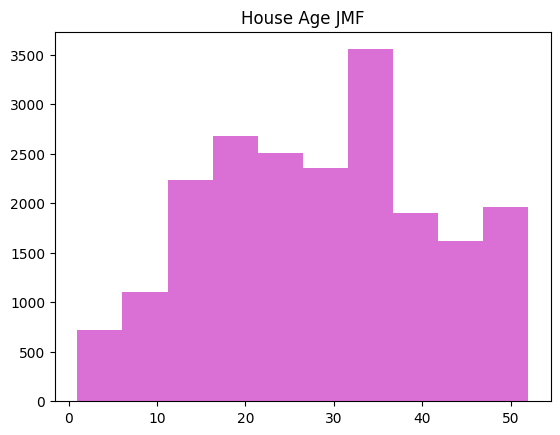

In [246]:
import matplotlib.pyplot as plt

plt.hist(dataf['HouseAge'], color = 'orchid')
#dataf['HouseAge'].hist(color = 'orchid')
plt.title('House Age JMF')
plt.show()

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

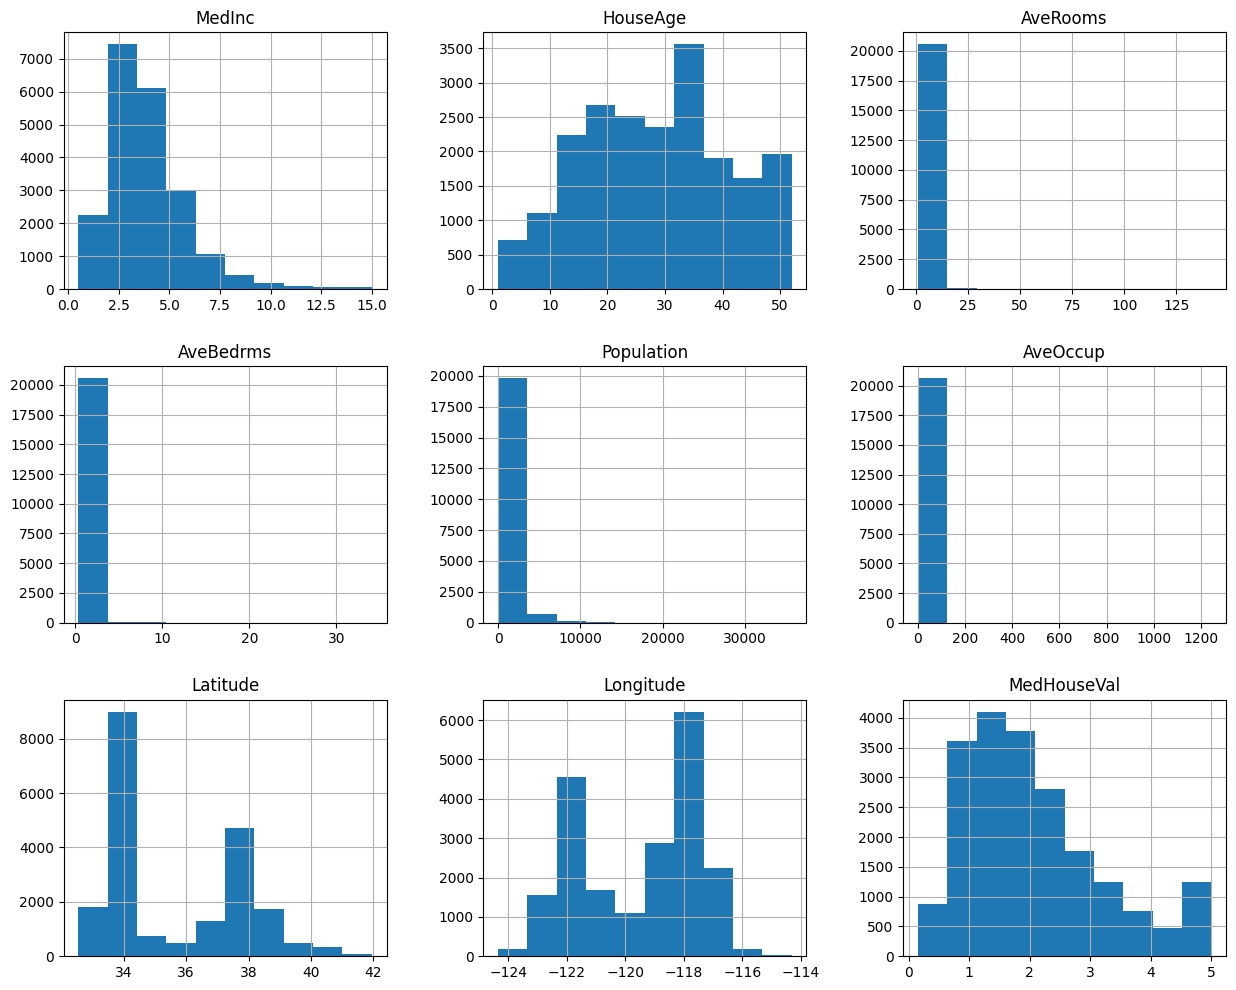

In [247]:
dataf.hist(figsize= (15, 12))